In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('dataset.csv')

df

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,audios/1.wav,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,audios/2.wav,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,audios/3.wav,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,audios/4.wav,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,audios/5.wav,0.0
...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,audios/291.wav,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,audios/292.wav,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,audios/293.wav,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,audios/294.wav,1.0


In [3]:
df = df.dropna(how="all")
df.to_csv("dataset.csv", index=False)

df

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,audios/1.wav,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,audios/2.wav,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,audios/3.wav,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,audios/4.wav,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,audios/5.wav,0.0
...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,audios/291.wav,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,audios/292.wav,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,audios/293.wav,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,audios/294.wav,1.0


In [4]:
y_data= df['etiqueta']
x_data= df.drop(columns=['etiqueta'])

x_data

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,audios/1.wav
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,audios/2.wav
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,audios/3.wav
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,audios/4.wav
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,audios/5.wav
...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,audios/291.wav
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,audios/292.wav
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,audios/293.wav
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,audios/294.wav


In [5]:
#sumar cuantos datos hay por cada etiqueta
val=y_data.unique()

val_counts=y_data.value_counts()
val_counts



etiqueta
0.0    170
1.0    125
Name: count, dtype: int64

In [6]:

x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genero       295 non-null    object 
 1   Edad         295 non-null    float64
 2   pregunta     295 non-null    object 
 3   t_respuesta  295 non-null    float64
 4   min          295 non-null    float64
 5   max          295 non-null    float64
 6   promedio     295 non-null    float64
 7   audio        295 non-null    object 
dtypes: float64(5), object(3)
memory usage: 18.6+ KB


In [7]:
import librosa
import numpy as np
import os
import scipy.signal as signal

ruta=x_data['audio'].values

def extraer_caracteristicas(ruta):
    y, sr = librosa.load(ruta, sr=None)

    sos = signal.butter(10, [300, 3400], 'bandpass', fs=sr, output='sos')
    y = signal.sosfilt(sos, y)

    centroide = librosa.feature.spectral_centroid(y=y, sr=sr)
    banda = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).mean()
    zcr = librosa.feature.zero_crossing_rate(y).mean()

    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=80, fmax=400)
    f0= f0[~np.isnan(f0)]
    pitch_mean = np.mean(f0) if len(f0) > 0 else 0
    pitch_std = np.std(f0) if len(f0) > 0 else 0

    jitter=pitch_std/pitch_mean if pitch_mean !=0 else 0
    shimer=rms_std/rms_mean if rms_mean !=0 else 0

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc1_mean = mfccs[0].mean()
    mfcc2_mean = mfccs[1].mean()  

    return [centroide, banda, rolloff, zcr, rms_mean, rms_std, pitch_mean, pitch_std, jitter, shimer, mfcc1_mean, mfcc2_mean]



In [8]:
caracteristicas = [extraer_caracteristicas(r) for r in ruta]

caracteristicas_df = pd.DataFrame(caracteristicas, columns=['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff',
                                                            'zero_crossing_rate', 'rms_mean', 'rms_std', 'pitch_mean',
                                                            'pitch_std', 'jitter', 'shimmer', 'mfcc1_mean', 'mfcc2_mean'])

caracteristicas_df


,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean
0,"[[1313.8235582247034, 1170.5359714301117, 1269...","[[868.8697861533435, 848.32346606704, 918.6095...",2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903
1,"[[1314.962324312985, 1221.3599639865683, 1241....","[[960.8006464029612, 919.7224200515715, 951.95...",2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030
2,"[[1589.81132913237, 1493.7112378276656, 1473.4...","[[915.1276604313765, 910.4917433712328, 907.89...",2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598
3,"[[1119.111177083738, 1123.6474867046315, 1144....","[[927.0151949357032, 925.423925512738, 904.528...",2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819
4,"[[1483.239111059491, 1525.0696152170747, 1522....","[[901.7750885726025, 976.0885771038382, 1015.2...",2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408
...,...,...,...,...,...,...,...,...,...,...,...,...
290,"[[1157.568765282515, 1150.7279946194897, 1224....","[[898.1703696940064, 877.9393920934207, 899.63...",2057.542067,0.032320,0.004595,0.003901,84.558734,1.381395,0.016337,0.848859,-616.004759,214.123836
291,"[[1704.8996845071317, 1609.725303338234, 1539....","[[1211.6191664834607, 1188.674927796159, 1158....",1963.942308,0.026931,0.004388,0.002654,90.609004,3.938940,0.043472,0.604857,-618.695998,223.596328
292,"[[1379.4329025720601, 1289.519838011572, 1205....","[[923.2164472988777, 884.0453492364276, 821.09...",2072.620739,0.031250,0.004839,0.003241,87.907159,0.948064,0.010785,0.669774,-610.931191,226.470399
293,"[[1203.3332692369502, 1151.0013323701287, 1105...","[[826.5135355389597, 797.313390879066, 810.343...",1547.916667,0.023481,0.007070,0.005882,194.829779,25.556991,0.131176,0.831962,-600.730300,202.923443


In [9]:
x_data=x_data.drop(columns=['audio'])

x_final = pd.concat([x_data.reset_index(drop=True), caracteristicas_df.reset_index(drop=True)], axis=1)

x_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,"[[1313.8235582247034, 1170.5359714301117, 1269...","[[868.8697861533435, 848.32346606704, 918.6095...",2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,"[[1314.962324312985, 1221.3599639865683, 1241....","[[960.8006464029612, 919.7224200515715, 951.95...",2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,"[[1589.81132913237, 1493.7112378276656, 1473.4...","[[915.1276604313765, 910.4917433712328, 907.89...",2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,"[[1119.111177083738, 1123.6474867046315, 1144....","[[927.0151949357032, 925.423925512738, 904.528...",2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,"[[1483.239111059491, 1525.0696152170747, 1522....","[[901.7750885726025, 976.0885771038382, 1015.2...",2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,"[[1157.568765282515, 1150.7279946194897, 1224....","[[898.1703696940064, 877.9393920934207, 899.63...",2057.542067,0.032320,0.004595,0.003901,84.558734,1.381395,0.016337,0.848859,-616.004759,214.123836
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,"[[1704.8996845071317, 1609.725303338234, 1539....","[[1211.6191664834607, 1188.674927796159, 1158....",1963.942308,0.026931,0.004388,0.002654,90.609004,3.938940,0.043472,0.604857,-618.695998,223.596328
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,"[[1379.4329025720601, 1289.519838011572, 1205....","[[923.2164472988777, 884.0453492364276, 821.09...",2072.620739,0.031250,0.004839,0.003241,87.907159,0.948064,0.010785,0.669774,-610.931191,226.470399
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,"[[1203.3332692369502, 1151.0013323701287, 1105...","[[826.5135355389597, 797.313390879066, 810.343...",1547.916667,0.023481,0.007070,0.005882,194.829779,25.556991,0.131176,0.831962,-600.730300,202.923443


In [10]:
df_final = pd.concat([x_final.reset_index(drop=True), y_data.reset_index(drop=True)], axis=1)

df_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,"[[1313.8235582247034, 1170.5359714301117, 1269...","[[868.8697861533435, 848.32346606704, 918.6095...",2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,"[[1314.962324312985, 1221.3599639865683, 1241....","[[960.8006464029612, 919.7224200515715, 951.95...",2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,"[[1589.81132913237, 1493.7112378276656, 1473.4...","[[915.1276604313765, 910.4917433712328, 907.89...",2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,"[[1119.111177083738, 1123.6474867046315, 1144....","[[927.0151949357032, 925.423925512738, 904.528...",2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,"[[1483.239111059491, 1525.0696152170747, 1522....","[[901.7750885726025, 976.0885771038382, 1015.2...",2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,"[[1157.568765282515, 1150.7279946194897, 1224....","[[898.1703696940064, 877.9393920934207, 899.63...",2057.542067,0.032320,0.004595,0.003901,84.558734,1.381395,0.016337,0.848859,-616.004759,214.123836,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,"[[1704.8996845071317, 1609.725303338234, 1539....","[[1211.6191664834607, 1188.674927796159, 1158....",1963.942308,0.026931,0.004388,0.002654,90.609004,3.938940,0.043472,0.604857,-618.695998,223.596328,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,"[[1379.4329025720601, 1289.519838011572, 1205....","[[923.2164472988777, 884.0453492364276, 821.09...",2072.620739,0.031250,0.004839,0.003241,87.907159,0.948064,0.010785,0.669774,-610.931191,226.470399,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,"[[1203.3332692369502, 1151.0013323701287, 1105...","[[826.5135355389597, 797.313390879066, 810.343...",1547.916667,0.023481,0.007070,0.005882,194.829779,25.556991,0.131176,0.831962,-600.730300,202.923443,1.0


In [11]:
df_final.dtypes

Genero                 object
Edad                  float64
pregunta               object
t_respuesta           float64
min                   float64
max                   float64
promedio              float64
spectral_centroid      object
spectral_bandwidth     object
spectral_rolloff      float64
zero_crossing_rate    float64
rms_mean              float32
rms_std               float32
pitch_mean            float64
pitch_std             float64
jitter                float64
shimmer               float32
mfcc1_mean            float64
mfcc2_mean            float64
etiqueta              float64
dtype: object

In [12]:
for col in ["spectral_centroid", "spectral_bandwidth"]:
    df_final[col] = df_final[col].apply(lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) else x)

df_final.dtypes

Genero                 object
Edad                  float64
pregunta               object
t_respuesta           float64
min                   float64
max                   float64
promedio              float64
spectral_centroid     float64
spectral_bandwidth    float64
spectral_rolloff      float64
zero_crossing_rate    float64
rms_mean              float32
rms_std               float32
pitch_mean            float64
pitch_std             float64
jitter                float64
shimmer               float32
mfcc1_mean            float64
mfcc2_mean            float64
etiqueta              float64
dtype: object

C:\Users\sarao\AppData\Local\Temp\ipykernel_7028\1526529776.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="etiqueta", y="t_respuesta", palette="pastel", ax=axes[1, 0])


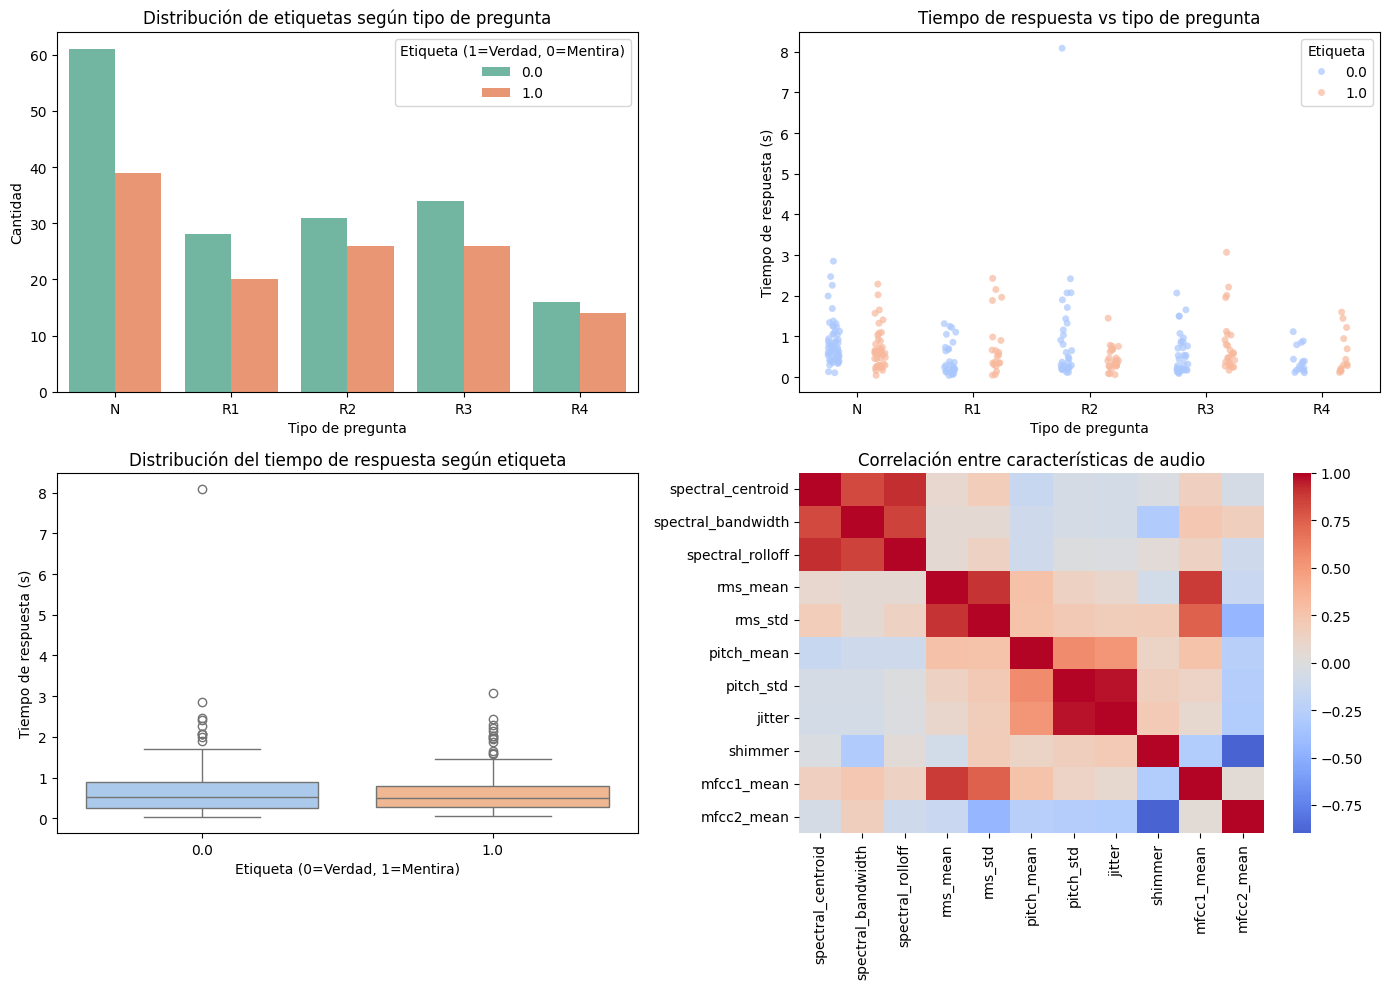

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


sns.countplot(data=df_final, x="pregunta", hue="etiqueta", palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Distribución de etiquetas según tipo de pregunta")
axes[0, 0].set_xlabel("Tipo de pregunta")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Etiqueta (1=Verdad, 0=Mentira)")


sns.stripplot(data=df_final, x="pregunta", y="t_respuesta",
              hue="etiqueta", jitter=True, dodge=True, alpha=0.7,
              palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Tiempo de respuesta vs tipo de pregunta")
axes[0, 1].set_xlabel("Tipo de pregunta")
axes[0, 1].set_ylabel("Tiempo de respuesta (s)")
axes[0, 1].legend(title="Etiqueta")


sns.boxplot(data=df_final, x="etiqueta", y="t_respuesta", palette="pastel", ax=axes[1, 0])
axes[1, 0].set_title("Distribución del tiempo de respuesta según etiqueta")
axes[1, 0].set_xlabel("Etiqueta (0=Verdad, 1=Mentira)")
axes[1, 0].set_ylabel("Tiempo de respuesta (s)")


cols_audio = [c for c in df_final.columns if c.startswith(('spectral_','rms', 'pitch', 'jitter', 'shimmer', 'mfcc'))]
corr = df_final[cols_audio].corr()

sns.heatmap(corr, cmap="coolwarm", center=0, ax=axes[1, 1])
axes[1, 1].set_title("Correlación entre características de audio")

plt.tight_layout()
plt.show()


In [14]:
df_final = df_final[df_final["t_respuesta"] <= 4]

df_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,1235.322215,930.582290,2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,1391.224503,1198.878955,2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,1575.874530,1039.063161,2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,1210.850463,974.920959,2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,1382.313523,1051.123066,2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,1124.433670,908.390598,2057.542067,0.032320,0.004595,0.003901,84.558734,1.381395,0.016337,0.848859,-616.004759,214.123836,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,1091.289145,964.845328,1963.942308,0.026931,0.004388,0.002654,90.609004,3.938940,0.043472,0.604857,-618.695998,223.596328,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,1153.770964,984.858186,2072.620739,0.031250,0.004839,0.003241,87.907159,0.948064,0.010785,0.669774,-610.931191,226.470399,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,957.842624,817.438848,1547.916667,0.023481,0.007070,0.005882,194.829779,25.556991,0.131176,0.831962,-600.730300,202.923443,1.0


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

cat_drop = ["Genero"]    
cat_full = ["pregunta"]  
num_cols = [c for c in df_final.columns if c not in cat_drop + cat_full + ["etiqueta"]]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat_drop", OneHotEncoder(drop="first"), cat_drop),
    ("cat_full", OneHotEncoder(drop=None), cat_full)
])

pipeline = Pipeline([
    ("preprocess", preprocessor)
])


X_processed = pipeline.fit_transform(df_final.drop(columns=["etiqueta"]))

print("Forma final de los datos procesados:", X_processed.shape)

Forma final de los datos procesados: (294, 23)
